# Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/platforms-and-tools/blob/main/PyCaret/Predictiong_stock_price_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center) 


Here is the walkthrough video of this notebook on [![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://youtu.be/QcCDReclVu8?si=mKo0o99dYYrtjFlR)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Stock market price predictions

Can we predict stock market price with classical econometrics models or machine learning models?

Documentation: 

1. **PyCaret**: https://pycaret.readthedocs.io/en/latest/index.html PyCaret3.0
2. **sktime** : https://www.sktime.net/en/stable/api_reference/forecasting.html

# Installation

Follow the steps here: https://pycaret.gitbook.io/docs/get-started/installation


In [1]:
#only if you want to run it in Google Colab: 
# for this chapter, we can install the light version of PyCaret as below. 

#!pip install pycaret[full]

In [2]:
# if you got a warning that you need to "RESTART RUNTIME", go ahead and press that button. 

# let's double ckeck the Pycaret version: 
from pycaret.utils import version
version()

'3.3.2'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Stock Dataset

In [4]:
stocks = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/yfinance.csv", index_col=0, header=[0,1])
stocks.head()

Adj Close                                                 \
                 AAPL         GLD       MSFT         QQQ         SPY   
Date                                                                   
2018-01-02  40.722874  125.150002  80.229012  152.072800  243.072266   
2018-01-03  40.715786  124.820000  80.602394  153.550400  244.609711   
2018-01-04  40.904907  125.459999  81.311806  153.819046  245.640732   
2018-01-05  41.370617  125.330002  82.319908  155.363861  247.277679   
2018-01-08  41.216949  125.309998  82.403923  155.968399  247.729935   

                                      Close                         ...  \
                 TSLA        USO       AAPL         GLD       MSFT  ...   
Date                                                                ...   
2018-01-02  21.368668  96.559998  43.064999  125.150002  85.949997  ...   
2018-01-03  21.150000  98.720001  43.057499  124.820000  86.349998  ...   
2018-01-04  20.974667  98.959999  43.257500  125.459999  87.110001  ...   
2018-01-05  21.105333  98.480003  43.750000  125.330002  88.190002  ...   
2018-01-08  22.427334  99.040001  43.587502  125.309998  88.279999  ...   

                  Open                           Volume                      \
                   SPY       TSLA        USO       AAPL       GLD      MSFT   
Date                                                                          
2018-01-02  267.839996  20.799999  96.559998  102223600  11762500  22483800   
2018-01-03  268.959991  21.400000  97.360001  118071600   7904300  26061400   
2018-01-04  271.200012  20.858000  98.639999   89738400   7329700  21912000   
2018-01-05  272.510010  21.108000  98.239998   94640000   5739900  23407100   
2018-01-08  273.309998  21.066668  98.480003   82271200   3566700  22113000   

                                                    
                 QQQ       SPY       TSLA      USO  
Date                                                
2018-01-02  32573300  86655700   65283000  1497588  
2018-01-03  29383600  90070400   67822500  2156150  
2018-01-04  24776100  80636400  149194500  1480988  
2018-01-05  26992300  83524000   68868000  1609888  
2018-01-08  23159100  57319200  147891000  1229225  

[5 rows x 42 columns]

In [5]:
# if you are working with Pandas, your first job should be changing the type of the index to datetime and then to period! This is a compatibility issue with other packages. 
stocks.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-16',
       ...
       '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
       '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype='object', name='Date', length=1509)

In [6]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
             '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
             '2023-12-28', '2023-12-29'],
            dtype='period[B]', name='Date', length=1509)

In [7]:
df = stocks['Close'][['AAPL']]
df.head()

AAPL
Date                 
2018-01-02  43.064999
2018-01-03  43.057499
2018-01-04  43.257500
2018-01-05  43.750000
2018-01-08  43.587502

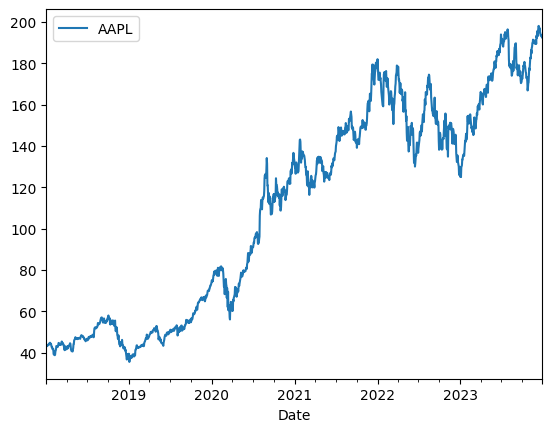

In [8]:
df.plot()
plt.show()

In [9]:
df.index

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-16',
             ...
             '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
             '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
             '2023-12-28', '2023-12-29'],
            dtype='period[B]', name='Date', length=1509)

In [10]:
idx = pd.period_range(min(df.index), max(df.index))
idx

PeriodIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
             '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
             '2018-01-12', '2018-01-15',
             ...
             '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
             '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
             '2023-12-28', '2023-12-29'],
            dtype='period[B]', length=1564)

In [11]:
df.index.symmetric_difference(idx)

PeriodIndex(['2018-01-15', '2018-02-19', '2018-03-30', '2018-05-28',
             '2018-07-04', '2018-09-03', '2018-11-22', '2018-12-05',
             '2018-12-25', '2019-01-01', '2019-01-21', '2019-02-18',
             '2019-04-19', '2019-05-27', '2019-07-04', '2019-09-02',
             '2019-11-28', '2019-12-25', '2020-01-01', '2020-01-20',
             '2020-02-17', '2020-04-10', '2020-05-25', '2020-07-03',
             '2020-09-07', '2020-11-26', '2020-12-25', '2021-01-01',
             '2021-01-18', '2021-02-15', '2021-04-02', '2021-05-31',
             '2021-07-05', '2021-09-06', '2021-11-25', '2021-12-24',
             '2022-01-17', '2022-02-21', '2022-04-15', '2022-05-30',
             '2022-06-20', '2022-07-04', '2022-09-05', '2022-11-24',
             '2022-12-26', '2023-01-02', '2023-01-16', '2023-02-20',
             '2023-04-07', '2023-05-29', '2023-06-19', '2023-07-04',
             '2023-09-04', '2023-11-23', '2023-12-25'],
            dtype='period[B]')

In [12]:
df = df.reindex(idx, fill_value=np.nan)
df.tail()

AAPL
2023-12-25         NaN
2023-12-26  193.050003
2023-12-27  193.149994
2023-12-28  193.580002
2023-12-29  192.529999

In [13]:
df = df.fillna(method = 'ffill')
df.tail(10)

AAPL
2023-12-18  195.889999
2023-12-19  196.940002
2023-12-20  194.830002
2023-12-21  194.679993
2023-12-22  193.600006
2023-12-25  193.600006
2023-12-26  193.050003
2023-12-27  193.149994
2023-12-28  193.580002
2023-12-29  192.529999

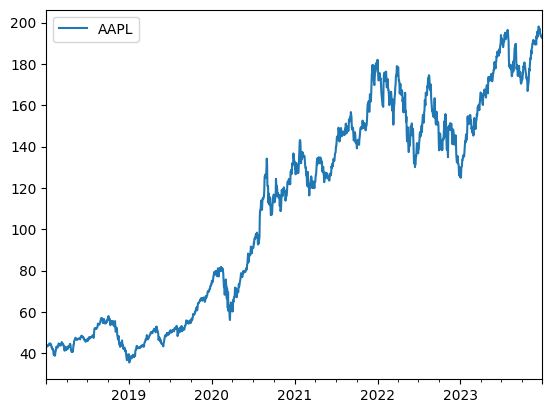

In [14]:
df.plot()
plt.show()

# Time series Cross validation with PyCaret

In [15]:
from pycaret.time_series import *

if you get the following error "cannot import name 'LegacyVersion' from 'packaging.version'", you should go ahead and downgrade the version of your packaging package! 

In [15]:
# !pip install packaging==21.3

In [16]:
from sktime.forecasting.model_selection import SlidingWindowSplitter
# https://www.sktime.org/en/stable/api_reference/auto_generated/sktime.forecasting.model_selection.SlidingWindowSplitter.html

In [17]:
import numpy as np
from sktime.forecasting.model_selection import SlidingWindowSplitter
ts = np.arange(10)
splitter = SlidingWindowSplitter(fh=np.arange(1,3), window_length=3, step_length=1)
list(splitter.split(ts)) 

[(array([0, 1, 2], dtype=int64), array([3, 4])),
 (array([1, 2, 3], dtype=int64), array([4, 5])),
 (array([2, 3, 4], dtype=int64), array([5, 6])),
 (array([3, 4, 5], dtype=int64), array([6, 7])),
 (array([4, 5, 6], dtype=int64), array([7, 8])),
 (array([5, 6, 7], dtype=int64), array([8, 9]))]

In [18]:
df.size

1564

In [19]:
exp = TSForecastingExperiment()
exp.setup(data = df, target='AAPL' ,coverage=0.90, fold_strategy=SlidingWindowSplitter(fh=np.arange(1,23), window_length=130, step_length=130)) # using the past 6 months data to make prediction for the next month and moving half a year forward. 

---
---
___ 

Side note: 

I am not sure why, but PyCaret timeseries setup does not support sklearn cross validation strategies like "TimeSeriesSplit". This is available with the PyCaret regression and classification though!!!

I was expecting the following code running in Pycaret but it doesn't. 


In [22]:
from sklearn.model_selection import TimeSeriesSplit
# exp2 = TSForecastingExperiment()
#exp2.setup(data = df, target='AAPL' , coverage=0.90, fold_strategy=TimeSeriesSplit(n_splits=5, max_train_size=250, gap=20, test_size=60)) 

---
---
---

In [23]:
exp.plot_model(plot='train_test_split')

In [25]:
exp.plot_model(plot='cv')

Let's see which one is the best model?

In [26]:
exp.compare_models(sort='rmse')

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=HuberRegressor(), sp=9, window_length=9)

# Bootstrapping with PyCaret?

* curious to see how to bootstrapping is handled with PyCaret? 
search for the random forest model (rf_cds_dt) source code in Pycaret Github for example. 
* As you may see here (https://github.com/pycaret/pycaret/blob/676cdb963877f98496a57bc77317356a09e10d70/pycaret/containers/models/time_series.py ), the bootstrap is on and off and that's it. No special consideration for moving block bootstrap or circular block or stationary bootstrap. 

* You can do it from scratch here: https://arch.readthedocs.io/en/latest/bootstrap/timeseries-bootstraps.html
---

In [27]:
my_models = ['naive','ets', 'arima', 'rf_cds_dt', 'knn_cds_dt', 'xgboost_cds_dt', 'lightgbm_cds_dt', 'catboost_cds_dt' , 'gbr_cds_dt']
exp.compare_models(include=my_models, sort='rmse')

NaiveForecaster()

Let's tuned these models!

In [28]:
ets = exp.create_model('ets')

In [29]:
tuned_ets = exp.tune_model(ets)

Fitting 11 folds for each of 10 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    0.6s finished


In [30]:
arima = exp.create_model('arima')

In [31]:
tuned_arima = exp.tune_model(arima)

Fitting 11 folds for each of 10 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    1.2s finished


For machine learning models, we need to create a feature space. How many lags you want to use for predicting future values. This is know as window_length=10. Default value=10. 

In [32]:
xgboost = exp.create_model('xgboost_cds_dt')

In [33]:
tuned_xgboost = exp.tune_model(xgboost)

Fitting 11 folds for each of 10 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    2.3s finished


In [34]:
knn = exp.create_model('knn_cds_dt')

In [35]:
tuned_knn = exp.tune_model(knn)

Fitting 11 folds for each of 10 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    3.7s finished


Probably, the tuned_ets is the bets performer here! barely outperforming the random walk model with no drift!!

In [36]:
tuned_ets

AutoETS(seasonal='mul', sp=9, trend='mul')

In [37]:
exp.plot_model(estimator=tuned_ets, plot="diagnostics")

In [38]:
exp.plot_model(tuned_ets, plot='insample')

In [39]:
exp.plot_model(tuned_ets, plot='forecast', data_kwargs={'fh':36})

---
# Predict Model

This function predicts Label using a trained model. When data is None, it predicts label on the holdout set.



In [40]:
holdout_pred = exp.predict_model(tuned_ets)

In [41]:
holdout_pred

y_pred
2023-11-30  189.3707
2023-12-01  190.0966
2023-12-04  189.7207
2023-12-05  189.7220
2023-12-06  189.6895
2023-12-07  190.0891
2023-12-08  190.1000
2023-12-11  189.6476
2023-12-12  190.1589
2023-12-13  190.1367
2023-12-14  190.8656
2023-12-15  190.4881
2023-12-18  190.4894
2023-12-19  190.4568
2023-12-20  190.8580
2023-12-21  190.8689
2023-12-22  190.4147
2023-12-25  190.9281
2023-12-26  190.9058
2023-12-27  191.6376
2023-12-28  191.2586
2023-12-29  191.2599

# Finalize Model

This function trains a given estimator on the entire dataset including the holdout set.

Model finalization is the last step in the experiment. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The finalize_model() function fits the model onto the complete dataset including the test/hold-out sample. The purpose of this function is to train the model on the complete dataset before it is deployed in production.


In [42]:
final_model = exp.finalize_model(tuned_ets)

In [43]:
exp.plot_model(final_model, plot='forecast', data_kwargs={'fh':24})

In [44]:
unseen_predictions = exp.predict_model(final_model, fh=10)
unseen_predictions

y_pred
2024-01-01  192.6242
2024-01-02  193.0071
2024-01-03  192.9669
2024-01-04  192.3439
2024-01-05  192.8452
2024-01-08  192.8469
2024-01-09  193.7217
2024-01-10  193.5261
2024-01-11  193.6744
2024-01-12  193.7203

# Done!